In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_dir = 'data\massive_stars.parquet'

In [4]:
data = pd.read_parquet(data_dir)
data.head(5)

,source_id,teff_gspphot,logg_gspphot,mh_gspphot,spectraltype_esphs,Cat,flux
0,466475508969557888,18411.494141,3.5385,-0.3139,B,M,"[1.4043112e-15, 1.3886055e-15, 1.3119094e-15, ..."
1,3325513363920961408,16151.836914,3.7164,0.0395,B,M,"[1.4678052e-15, 1.3982165e-15, 1.3334084e-15, ..."
2,3375508943611375488,18823.841797,3.4316,0.2918,B,M,"[1.0764202e-15, 1.0605224e-15, 1.0162869e-15, ..."
3,4063973032805550592,15295.044922,3.4026,0.0999,G,M,"[9.53517e-16, 9.214246e-16, 8.3622285e-16, 7.9..."
4,454379128715344896,13149.229492,3.8305,-0.9505,B,LM,"[6.8294334e-16, 6.693247e-16, 6.1780524e-16, 5..."


In [18]:
df = data.drop(columns = ['teff_gspphot', 'logg_gspphot', 'mh_gspphot', 'spectraltype_esphs'])
df.head()

,source_id,Cat,flux
0,466475508969557888,M,"[1.4043112e-15, 1.3886055e-15, 1.3119094e-15, ..."
1,3325513363920961408,M,"[1.4678052e-15, 1.3982165e-15, 1.3334084e-15, ..."
2,3375508943611375488,M,"[1.0764202e-15, 1.0605224e-15, 1.0162869e-15, ..."
3,4063973032805550592,M,"[9.53517e-16, 9.214246e-16, 8.3622285e-16, 7.9..."
4,454379128715344896,LM,"[6.8294334e-16, 6.693247e-16, 6.1780524e-16, 5..."


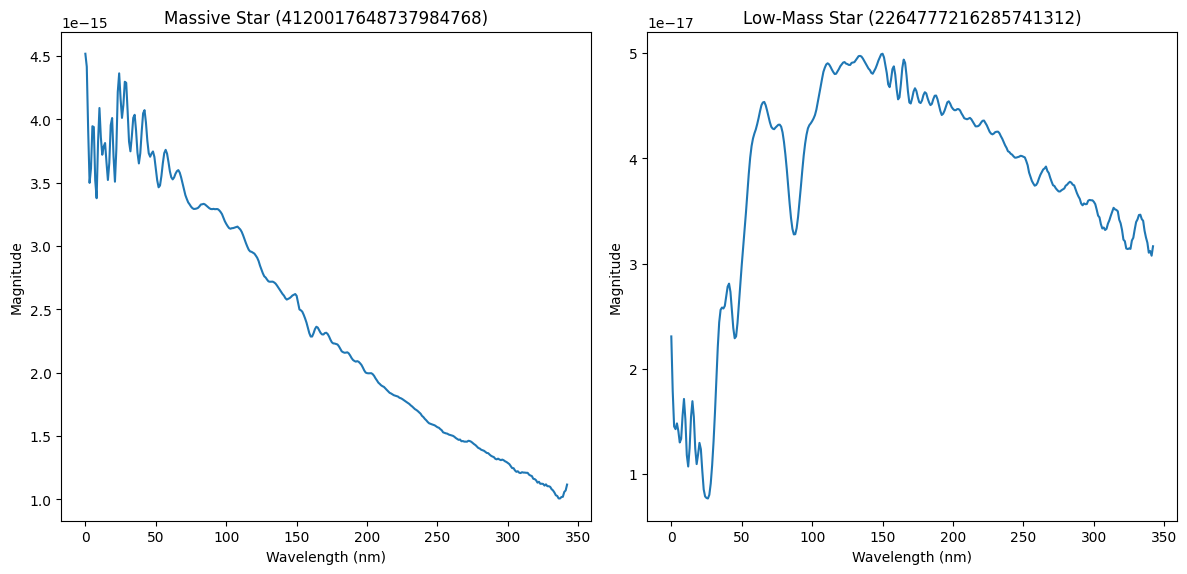

In [106]:
# execute this cell to see random examples of the difference in spectra


# Random sample from 'M' category (massive star)
sample_ms = df[df['Cat'] == 'M'].sample(n=1).index
flux_ms = df['flux'].iloc[sample_ms].values[0]
object_id_ms = df['source_id'].iloc[sample_ms].values[0]

# Ranomd sample from 'LM' category (low-mass star)
sample_lm = df[df['Cat'] == 'LM'].sample(n=1).index
flux_lm = df['flux'].iloc[sample_lm].values[0]
object_id_lm = df['source_id'].iloc[sample_lm].values[0]

plt.figure(figsize=(12, 6))

# Plot for 'M' category (massive star)
plt.subplot(1, 2, 1)
plt.plot(flux_ms)
plt.title(f"Massive Star ({object_id_ms})")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude')

# Plot for 'LM' category (low-mass star)
plt.subplot(1, 2, 2)
plt.plot(flux_lm)
plt.title(f"Low-Mass Star ({object_id_lm})")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


In [40]:
num_samples = df.shape[0]
spectrum_width = len(df['flux'][0])

num_samples_lm = df['Cat'].value_counts()['LM']
num_samples_m = df['Cat'].value_counts()['M']

print("Number of total spectral samples:", num_samples)
print("Number of bins in each spectra:", spectrum_width)
print("In the dataset, we have", num_samples_lm, "spectra for low mass stars and", num_samples_m, "spectra for high mass stars.")

Number of total spectral samples: 17627
Number of bins in each spectra: 343
In the dataset, we have 11026 spectra for low mass stars and 6601 spectra for high mass stars.


In [41]:
X = df['flux']
y = df['Cat']

y = y.replace({'LM': 0, 'M': 1})

X = X.to_numpy()
y = y.to_numpy()

C:\Users\bhatn\AppData\Local\Temp\ipykernel_11300\1894603577.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'LM': 0, 'M': 1})


In [8]:
split = 0.8

train_size = int(split * num_samples)

x_train, x_test = np.split(X, [train_size])
y_train, y_test = np.split(y, [train_size])

In [9]:
print("The dataset is divided into", len(x_train), "training samples and", len(x_test),"testing samples.")

The dataset is divided into 14101 training samples and 3526 testing samples.
